# Garbage Classification Neural Networks

## Prior to the model Architecture

### Imports

In [19]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf 
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D


### The Dataset 

So we have a dataset with less than 9000 images separated into 12 classes. What we are trying to do is creating a deep learning model that classifies the images. In line with COP28, which take place in the UAE, all of that is done to help with classifying trash types for recycling purposes in the middle east, considering that most vendors do this job manually.

### Checking the count of images (Balanced or Imbalanced)

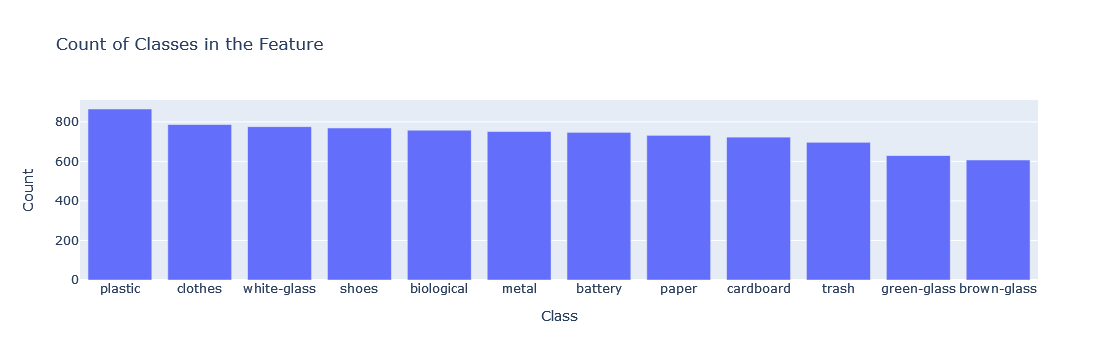

In [4]:
class_counts = data['class_'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']
fig = px.bar(class_counts, x='Class', y='Count', title='Count of Classes in the Feature')
fig.show()


Thankfully, the number of images' classes are balanced

### Visualizing Some of the Images

2023-11-09 02:02:09.607386: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-09 02:02:09.607411: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-09 02:02:09.607414: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-09 02:02:09.607615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-09 02:02:09.607664: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


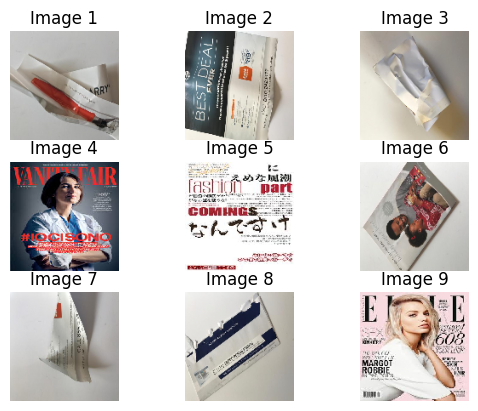

In [6]:
for i in range(9):
    orig = cv2.imread(data.iloc[i]['path'])
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    orig = orig * 1.0 / 255.0
    orig = cv2.resize(orig, (128, 128), interpolation=cv2.INTER_NEAREST)
    img = tf.expand_dims(orig, axis=0)

    plt.subplot(3, 3, i + 1)  
    plt.title(f'Image {i+1}')  
    plt.imshow(orig)  
    plt.axis('off') 

plt.show() 

### Image Preprocessing

In [22]:
# Preprocessing
image_size = (224, 224)  # image size we want

images = []
labels = []

for index, row in data.iterrows():
    img = Image.open(row['path'])
    img = img.resize(image_size)
    img = np.array(img)
    if img.shape == (224, 224, 3):  # shape of the image we need
        images.append(img)
        labels.append(row['class_'])

# Convert lists to arrays
images = np.array(images)
labels = np.array(labels)

# Convert labels to categorical variables
labels = pd.Series(labels)
labels = pd.get_dummies(labels)


By that, we have the images resized equally and converted to the number-representations to fit them into a deep learning model, and the labels for each class

## The Architectures/ Trials for the Deep Learning Models

### Splitting the data with test size 20%

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [24]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

### The First Simplest Architecture of ANN

In [10]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))  # Flatten the input
model.add(Dense(128, activation='relu'))  
model.add(Dense(64, activation='relu'))  
model.add(Dense(labels.shape[1], activation='softmax'))  # Output layer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 12)                780       
                                                                 
Total params: 19276748 (73.53 MB)
Trainable params: 19276748 (73.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


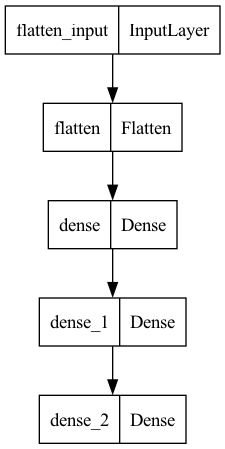

In [11]:
plot_model(model)

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


2023-11-08 22:53:14.494796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


221/221 [==============================] - 32s 139ms/step - loss: 99.0780 - accuracy: 0.1121 - val_loss: 50.8347 - val_accuracy: 0.1152
Epoch 2/50
221/221 [==============================] - 19s 87ms/step - loss: 53.7238 - accuracy: 0.1385 - val_loss: 68.8192 - val_accuracy: 0.1487
Epoch 3/50
221/221 [==============================] - 19s 88ms/step - loss: 43.8863 - accuracy: 0.1657 - val_loss: 32.0481 - val_accuracy: 0.2072
Epoch 4/50
221/221 [==============================] - 19s 88ms/step - loss: 40.5799 - accuracy: 0.1843 - val_loss: 42.7759 - val_accuracy: 0.1913
Epoch 5/50
221/221 [==============================] - 19s 86ms/step - loss: 40.4909 - accuracy: 0.2065 - val_loss: 51.8974 - val_accuracy: 0.2299
Epoch 6/50
221/221 [==============================] - 19s 86ms/step - loss: 47.2780 - accuracy: 0.2268 - val_loss: 40.1360 - val_accuracy: 0.2242
Epoch 7/50
221/221 [==============================] - 19s 87ms/step - loss: 31.8996 - accuracy: 0.2496 - val_loss: 44.8224 - val_accur

In [46]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Train loss: {train_loss}, Train accuracy: {train_accuracy}')
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

56/56 [==============================] - 4s 64ms/step - loss: 220.0563 - accuracy: 0.1844
Train loss: 210.3685760498047, Train accuracy: 0.17525187134742737
Test loss: 220.05628967285156, Test accuracy: 0.18444949388504028


/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_84211/908720665.py:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.

/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_84211/908720665.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.



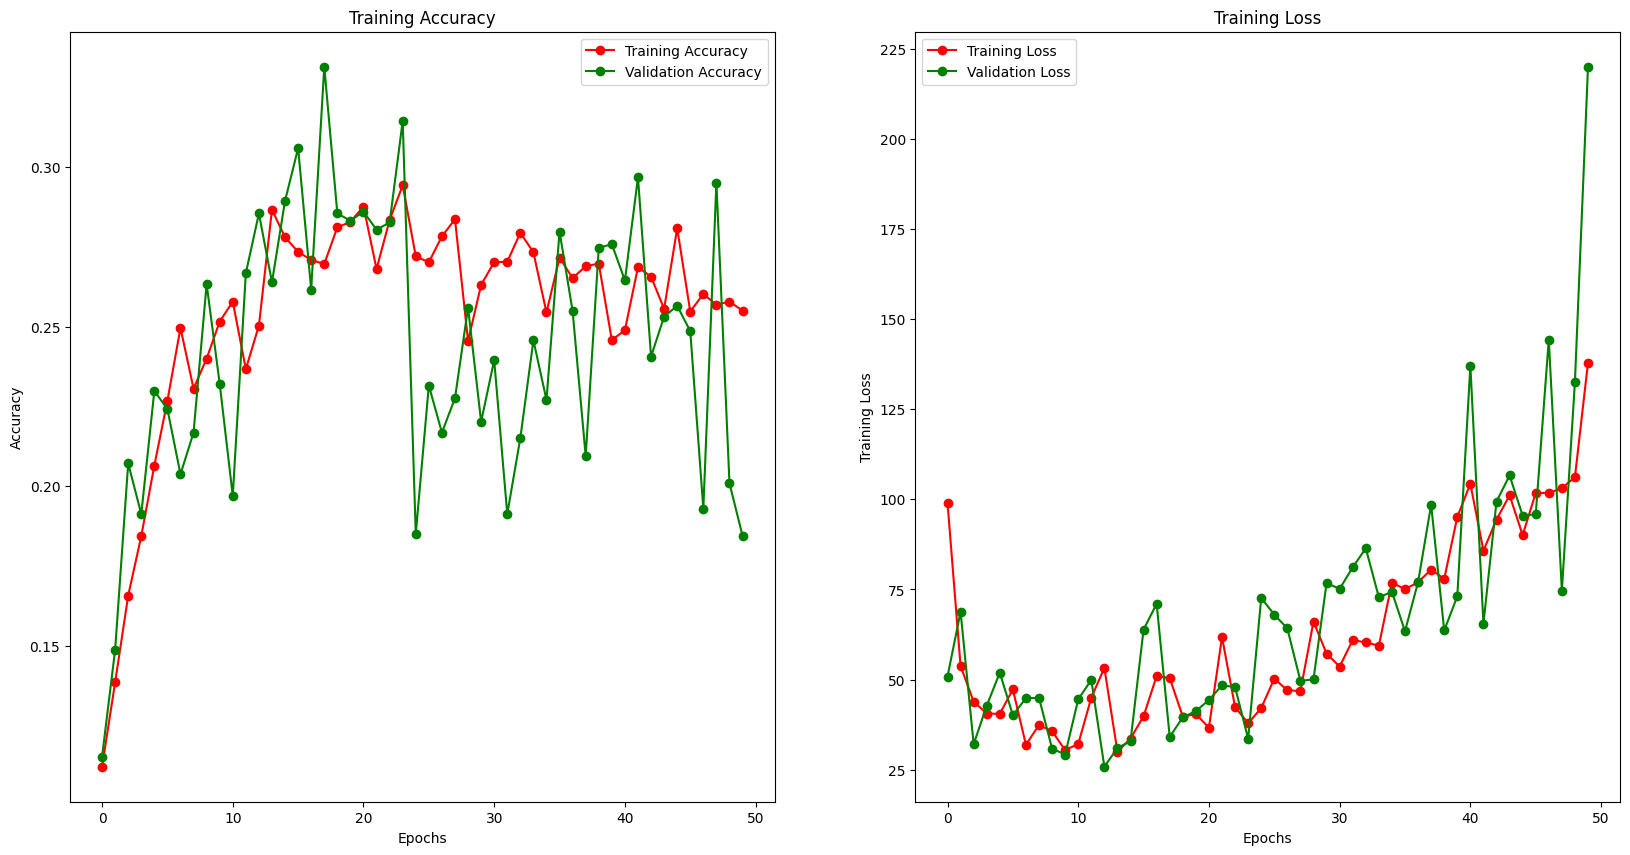

In [14]:
epochs = list(range(len(history.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

Accuracy: 0.1844494892167991


### Adjusting the model

In [22]:
model1 = Sequential()
model1.add(Flatten(input_shape=X_train.shape[1:]))  # Flatten the input
model1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  
model1.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))  
model1.add(Dense(labels.shape[1], activation='softmax'))  # Output layer 
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 128)               19267712  
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 12)                780       
                                                                 
Total params: 19276748 (73.53 MB)
Trainable params: 19276748 (73.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


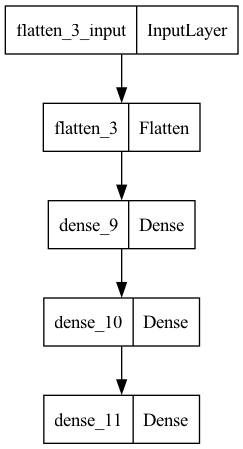

In [23]:
plot_model(model1)

In [24]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))  # Adjust epochs and batch_size as needed

Epoch 1/50


2023-11-08 23:19:38.644600: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


221/221 [==============================] - 31s 139ms/step - loss: 88.0186 - accuracy: 0.1594 - val_loss: 42.0846 - val_accuracy: 0.2338
Epoch 2/50
221/221 [==============================] - 23s 102ms/step - loss: 31.1729 - accuracy: 0.2154 - val_loss: 24.6049 - val_accuracy: 0.2582
Epoch 3/50
221/221 [==============================] - 23s 103ms/step - loss: 25.6559 - accuracy: 0.2408 - val_loss: 41.1192 - val_accuracy: 0.1896
Epoch 4/50
221/221 [==============================] - 23s 104ms/step - loss: 20.3998 - accuracy: 0.2610 - val_loss: 14.2115 - val_accuracy: 0.2940
Epoch 5/50
221/221 [==============================] - 22s 101ms/step - loss: 48.1206 - accuracy: 0.2414 - val_loss: 37.9121 - val_accuracy: 0.1913
Epoch 6/50
221/221 [==============================] - 23s 102ms/step - loss: 12.3557 - accuracy: 0.2950 - val_loss: 12.6070 - val_accuracy: 0.2866
Epoch 7/50
221/221 [==============================] - 22s 102ms/step - loss: 9.8072 - accuracy: 0.3081 - val_loss: 9.8397 - val_a

In [36]:
train_loss1, train_accuracy1 = model1.evaluate(X_train, y_train)
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
print(f'Train loss: {train_loss1}, Train accuracy: {train_accuracy1}')
print(f'Test loss: {test_loss1}, Test accuracy: {test_accuracy1}')

56/56 [==============================] - 4s 65ms/step - loss: 196.0318 - accuracy: 0.1907
Train loss: 191.9553680419922, Train accuracy: 0.17525187134742737
Test loss: 196.03182983398438, Test accuracy: 0.19069240987300873


/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_84211/3369673051.py:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.

/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_84211/3369673051.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.



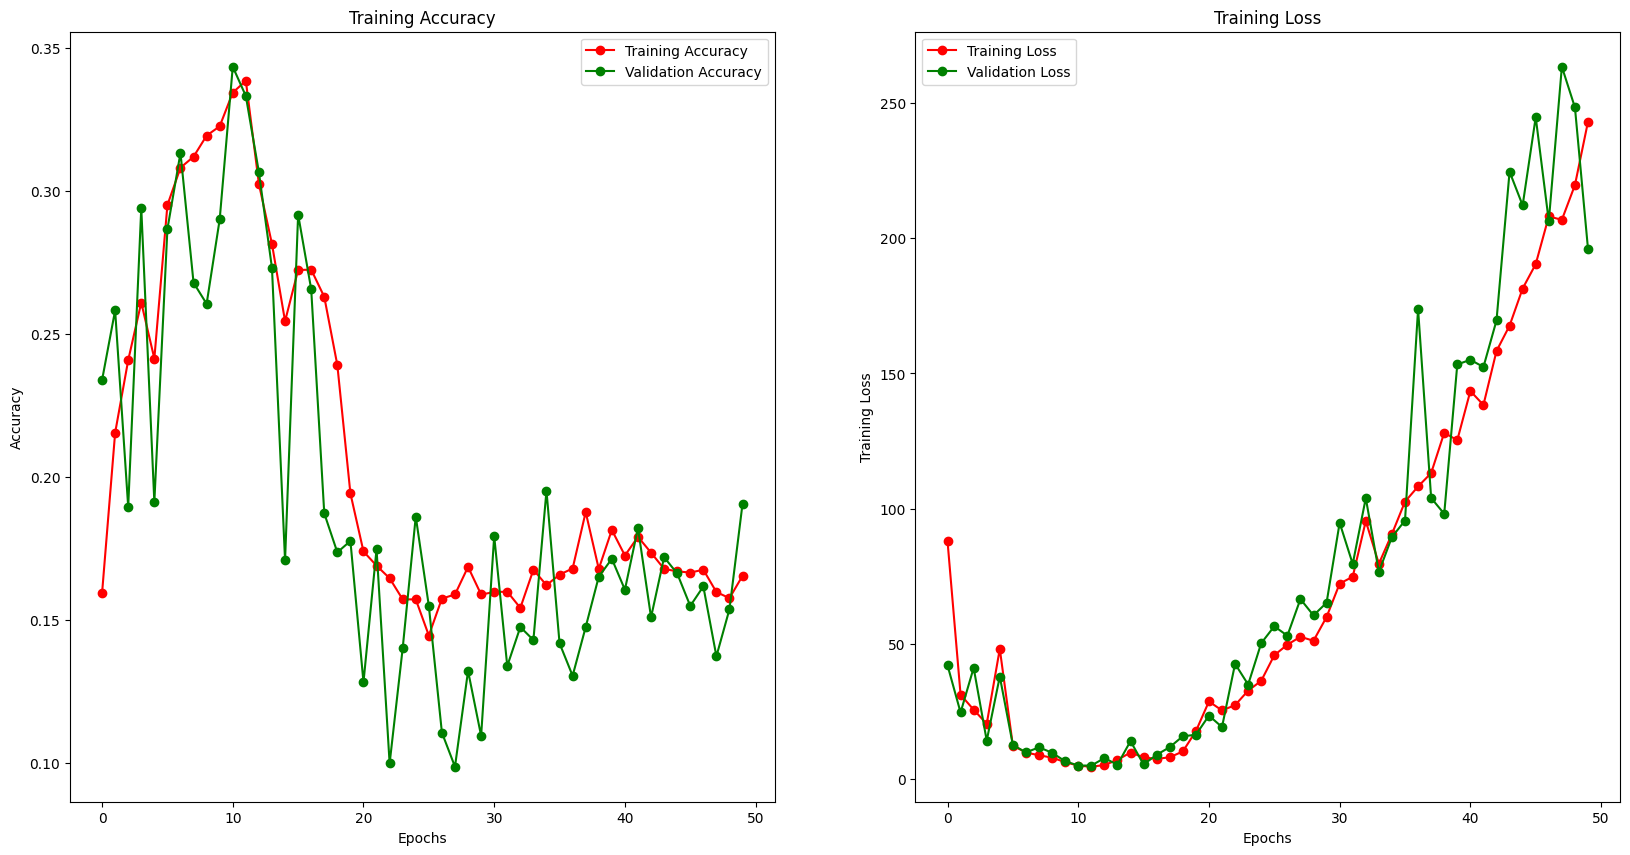

In [26]:
epochs = list(range(len(history1.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
val_acc = history1.history['val_accuracy']
val_loss = history1.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy1}")

Accuracy: 0.19069239500567536


### Adding another hidden layer

In [11]:
model11 = Sequential()
model11.add(Flatten(input_shape=X_train.shape[1:]))  # Flatten the input
model11.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001) ))  
model11.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  
model11.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  
model11.add(Dense(labels.shape[1], activation='softmax'))  # Output layer 
model11.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                                 
Total params: 19285836 (73.57 MB)
Trainable params: 19285836 (73.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


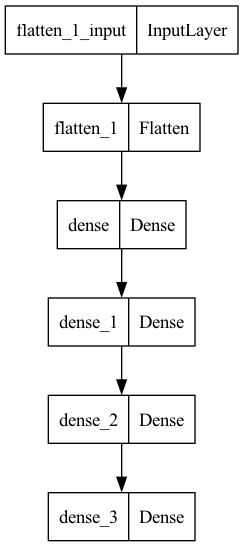

In [12]:
plot_model(model11)

In [13]:
history11 = model11.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))  # Adjust epochs and batch_size as needed

Epoch 1/50


2023-11-08 23:52:16.595613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-08 23:52:16.680031: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


221/221 [==============================] - 33s 143ms/step - loss: 17.6711 - accuracy: 0.1266 - val_loss: 6.7516 - val_accuracy: 0.1839
Epoch 2/50
221/221 [==============================] - 21s 93ms/step - loss: 9.2904 - accuracy: 0.1679 - val_loss: 4.1430 - val_accuracy: 0.1759
Epoch 3/50
221/221 [==============================] - 20s 92ms/step - loss: 5.1830 - accuracy: 0.1880 - val_loss: 4.4168 - val_accuracy: 0.1913
Epoch 4/50
221/221 [==============================] - 21s 97ms/step - loss: 5.6201 - accuracy: 0.1831 - val_loss: 6.1858 - val_accuracy: 0.1413
Epoch 5/50
221/221 [==============================] - 20s 92ms/step - loss: 6.2210 - accuracy: 0.1815 - val_loss: 5.9775 - val_accuracy: 0.2003
Epoch 6/50
221/221 [==============================] - 20s 92ms/step - loss: 7.1992 - accuracy: 0.1823 - val_loss: 4.6403 - val_accuracy: 0.2066
Epoch 7/50
221/221 [==============================] - 20s 92ms/step - loss: 4.5739 - accuracy: 0.2205 - val_loss: 3.9793 - val_accuracy: 0.2372
E

In [35]:
train_loss11, train_accuracy11 = model11.evaluate(X_train, y_train)
test_loss11, test_accuracy11 = model11.evaluate(X_test, y_test)
print(f'Train loss: {train_loss11}, Train accuracy: {train_accuracy11}')
print(f'Test loss: {test_loss11}, Test accuracy: {test_accuracy11}')

56/56 [==============================] - 4s 67ms/step - loss: 10.7974 - accuracy: 0.2242
Train loss: 10.614958763122559, Train accuracy: 0.22917553782463074
Test loss: 10.797369003295898, Test accuracy: 0.22417707741260529


/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_85606/3324715179.py:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.

/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_85606/3324715179.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.



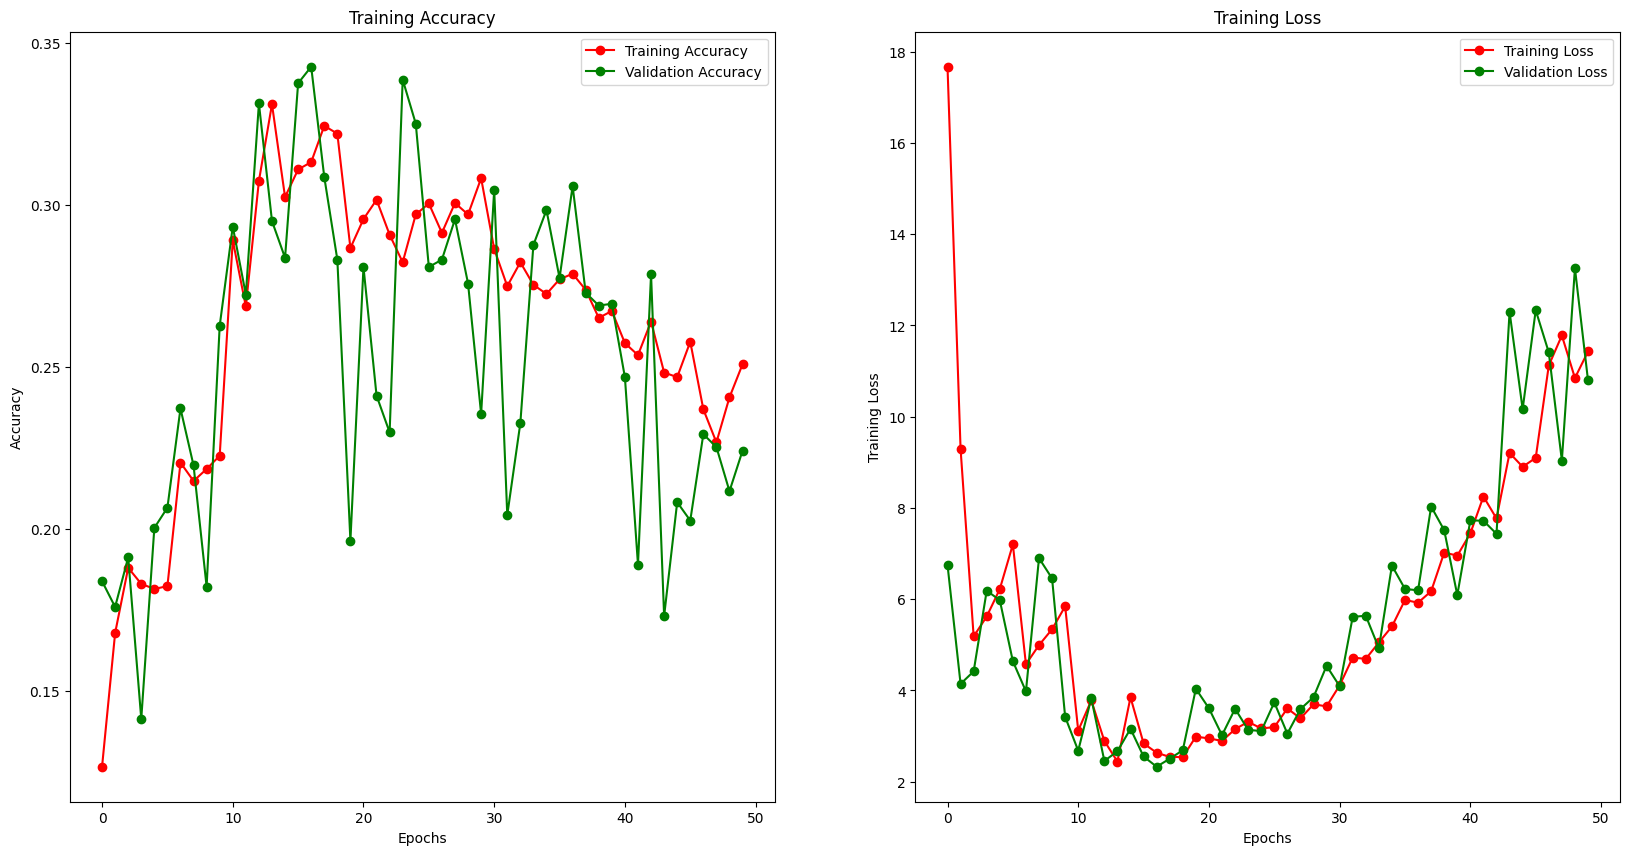

In [15]:
epochs = list(range(len(history11.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history11.history['accuracy']
train_loss = history11.history['loss']
val_acc = history11.history['val_accuracy']
val_loss = history11.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model11.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [18]:
accuracy11 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy11}")

Accuracy: 0.22417707150964813


### A more complex model (CNN)

In [19]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3))) # Conv2D sums up part of the images by elementwise multiplication to one pixel
model2.add(MaxPooling2D((2, 2))) # MaxPooling creates a feature map that contains the important values of the images 
model2.add(BatchNormalization()) # Helps stabilize the optimization process, reduce internal covariate shift, and improve gradient flow, leading to faster convergence and better generalization
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model2.add(Flatten())

# Add fully connected layers with dropout and batch normalization
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Output layer
model2.add(Dense(len(labels.columns), activation='softmax'))

opt = SGD(learning_rate=0.01)  
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 64)      256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)      

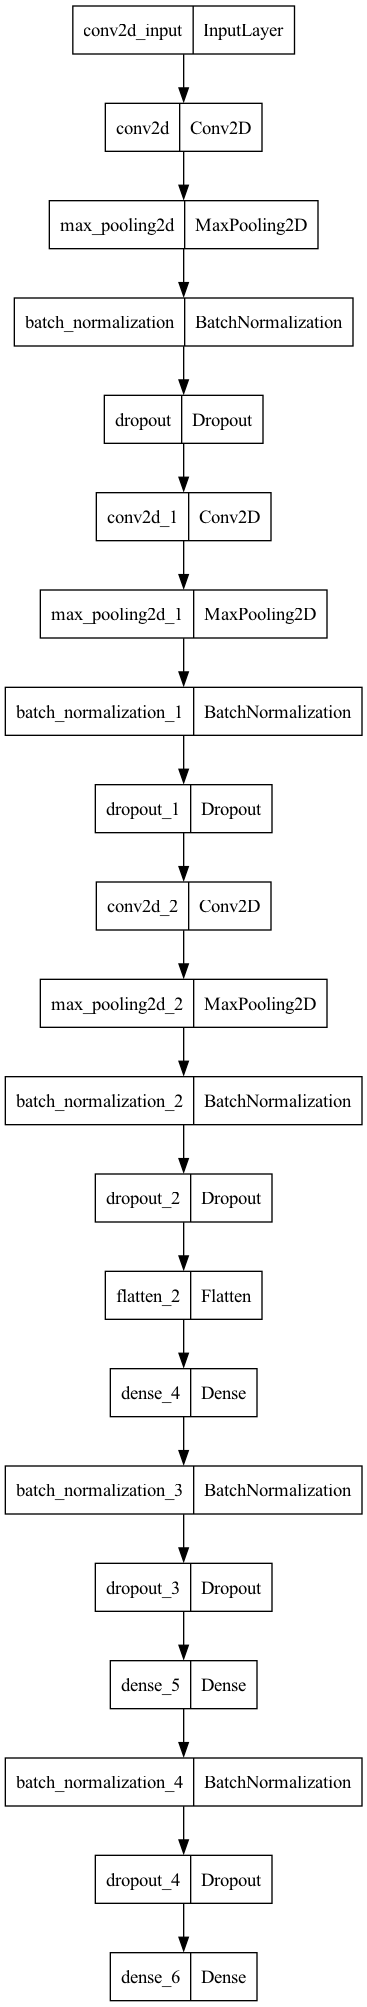

In [20]:
plot_model(model2)

In [25]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
221/221 [==============================] - 45s 144ms/step - loss: 2.2040 - accuracy: 0.3602 - val_loss: 3.8944 - val_accuracy: 0.0970
Epoch 2/100
221/221 [==============================] - 33s 151ms/step - loss: 1.6928 - accuracy: 0.4643 - val_loss: 2.8051 - val_accuracy: 0.2242
Epoch 3/100
221/221 [==============================] - 34s 155ms/step - loss: 1.4838 - accuracy: 0.5236 - val_loss: 2.2463 - val_accuracy: 0.2934
Epoch 4/100
221/221 [==============================] - 34s 154ms/step - loss: 1.3282 - accuracy: 0.5685 - val_loss: 2.1768 - val_accuracy: 0.2872
Epoch 5/100
221/221 [==============================] - 30s 138ms/step - loss: 1.2066 - accuracy: 0.6011 - val_loss: 1.7504 - val_accuracy: 0.4257
Epoch 6/100
221/221 [==============================] - 31s 138ms/step - loss: 1.0992 - accuracy: 0.6423 - val_loss: 1.8446 - val_accuracy: 0.4302
Epoch 7/100
221/221 [==============================] - 30s 137ms/step - loss: 1.0194 - accuracy: 0.6573 - val_loss: 2.9332 -

In [32]:
train_loss2, train_accuracy2 = model2.evaluate(X_train, y_train)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print(f'Train loss: {train_loss2}, Train accuracy: {train_accuracy2}')
print(f'Test loss: {test_loss2}, Test accuracy: {test_accuracy2}')

56/56 [==============================] - 5s 86ms/step - loss: 1.7935 - accuracy: 0.6453
Train loss: 0.006651479285210371, Train accuracy: 0.9984390139579773
Test loss: 1.793543815612793, Test accuracy: 0.6452894806861877


C:\Users\shrou\AppData\Local\Temp\ipykernel_15724\2647838900.py:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.

C:\Users\shrou\AppData\Local\Temp\ipykernel_15724\2647838900.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.



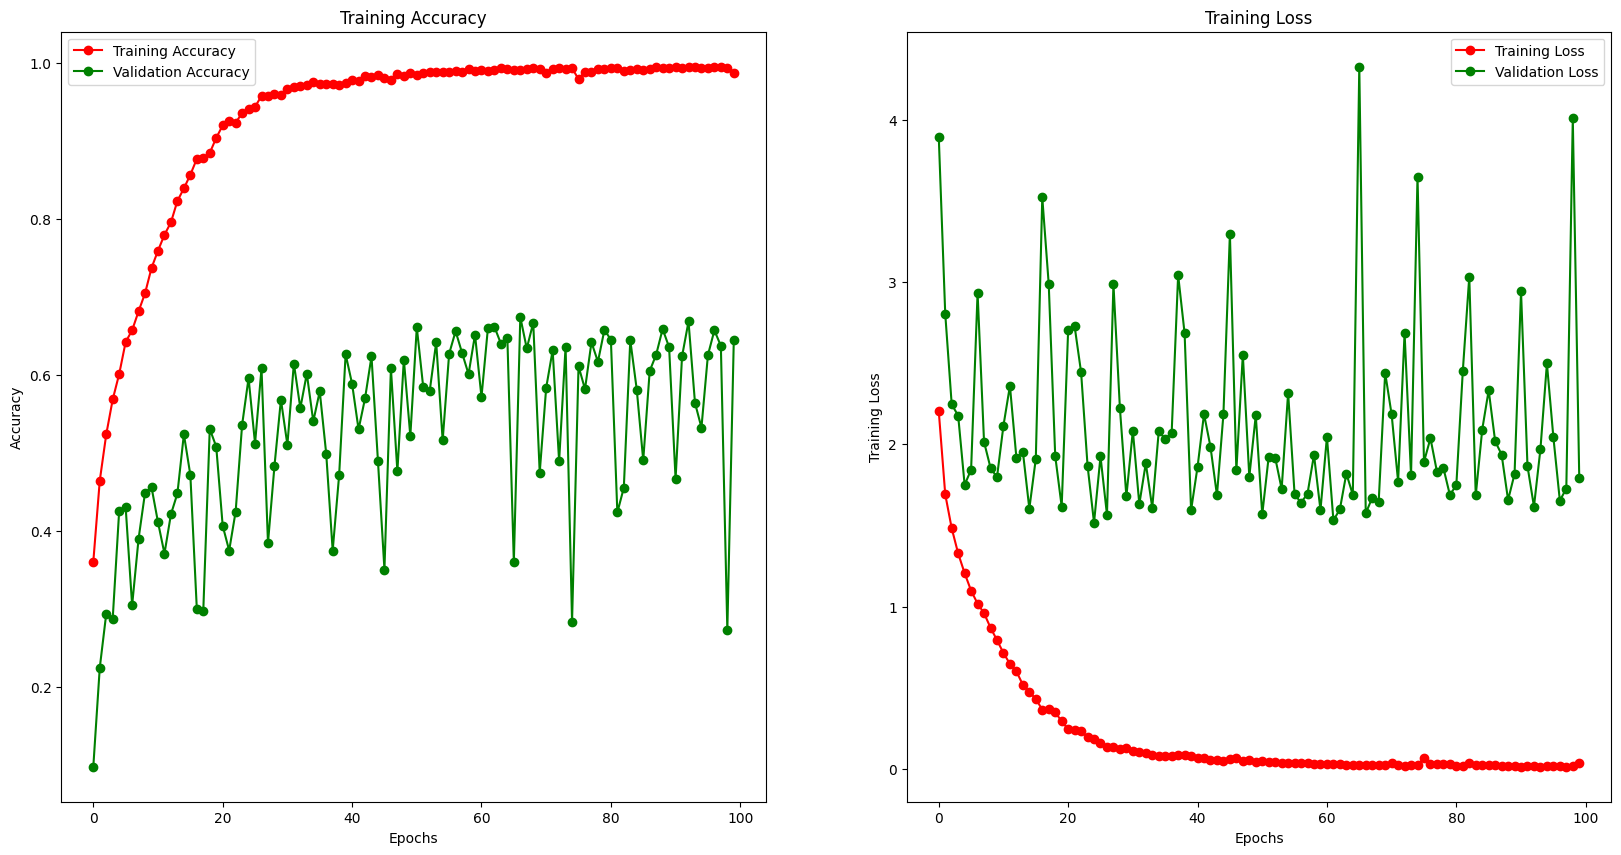

In [29]:
epochs = list(range(len(history2.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

56/56 [==============================] - 5s 87ms/step


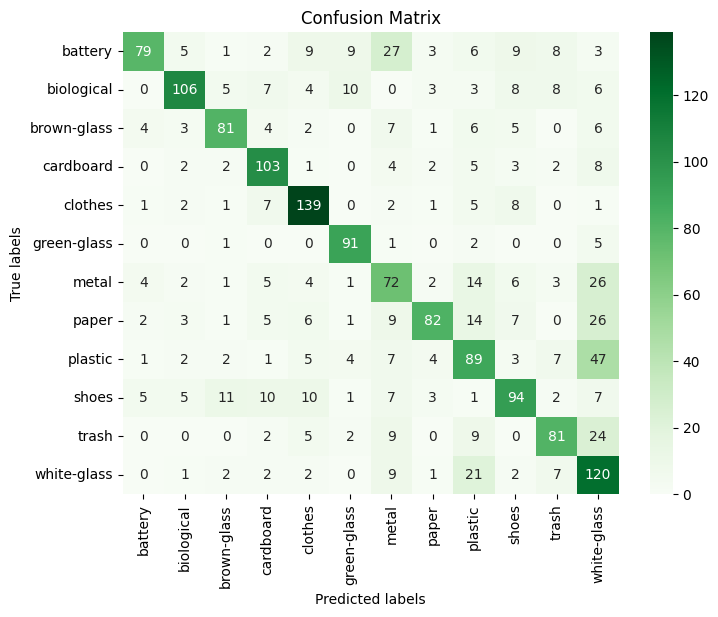

In [30]:
class_names = list(labels.columns)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [31]:
print(metrics.classification_report(y_true, y_pred_classes, target_names=labels.columns))

              precision    recall  f1-score   support

     battery       0.82      0.49      0.61       161
  biological       0.81      0.66      0.73       160
 brown-glass       0.75      0.68      0.71       119
   cardboard       0.70      0.78      0.74       132
     clothes       0.74      0.83      0.79       167
 green-glass       0.76      0.91      0.83       100
       metal       0.47      0.51      0.49       140
       paper       0.80      0.53      0.64       156
     plastic       0.51      0.52      0.51       172
       shoes       0.65      0.60      0.62       156
       trash       0.69      0.61      0.65       132
 white-glass       0.43      0.72      0.54       167

    accuracy                           0.65      1762
   macro avg       0.68      0.65      0.65      1762
weighted avg       0.67      0.65      0.65      1762



In [32]:
accuracy2 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.6452894438138479


### How about transfer learning?

In [9]:
# VGG16 base model
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

# weights file of vgg16
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'  # this is where the file in my directory; if u want to run it, make sure to install the weights and put in the right path:)
base_model.load_weights(weights_path)

model3 = Sequential()
model3.add(base_model)
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(len(labels.columns), activation='softmax'))

opt = Adam(learning_rate=0.0001)  
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                                 
Total params: 21140556 (80.64 MB)
Trainable params: 21140556 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


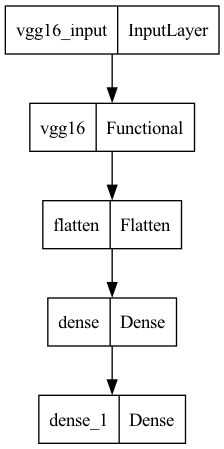

In [10]:
plot_model(model3)

In [11]:
history3 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


2023-11-09 00:22:05.126972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-09 00:22:05.232040: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


221/221 [==============================] - 219s 979ms/step - loss: 1.0995 - accuracy: 0.6360 - val_loss: 0.7153 - val_accuracy: 0.7633
Epoch 2/10
221/221 [==============================] - 216s 979ms/step - loss: 0.4574 - accuracy: 0.8528 - val_loss: 0.5110 - val_accuracy: 0.8451
Epoch 3/10
221/221 [==============================] - 217s 981ms/step - loss: 0.3078 - accuracy: 0.8980 - val_loss: 0.5020 - val_accuracy: 0.8468
Epoch 4/10
221/221 [==============================] - 216s 980ms/step - loss: 0.2371 - accuracy: 0.9235 - val_loss: 0.5410 - val_accuracy: 0.8428
Epoch 5/10
221/221 [==============================] - 217s 983ms/step - loss: 0.1744 - accuracy: 0.9448 - val_loss: 0.5123 - val_accuracy: 0.8564
Epoch 6/10
221/221 [==============================] - 216s 980ms/step - loss: 0.1498 - accuracy: 0.9502 - val_loss: 0.6258 - val_accuracy: 0.8439
Epoch 7/10
221/221 [==============================] - 217s 980ms/step - loss: 0.1531 - accuracy: 0.9542 - val_loss: 0.6400 - val_accura

In [39]:
train_loss3, train_accuracy3 = model3.evaluate(X_train, y_train)
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)
print(f'Train loss: {train_loss3}, Train accuracy: {train_accuracy3}')
print(f'Test loss: {test_loss3}, Test accuracy: {test_accuracy3}')

56/56 [==============================] - 14s 249ms/step - loss: 0.7265 - accuracy: 0.8485
Train loss: 0.100114606320858, Train accuracy: 0.9672200679779053
Test loss: 0.7265454530715942, Test accuracy: 0.8484677076339722


/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_86489/1784715554.py:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.

/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_86489/1784715554.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.



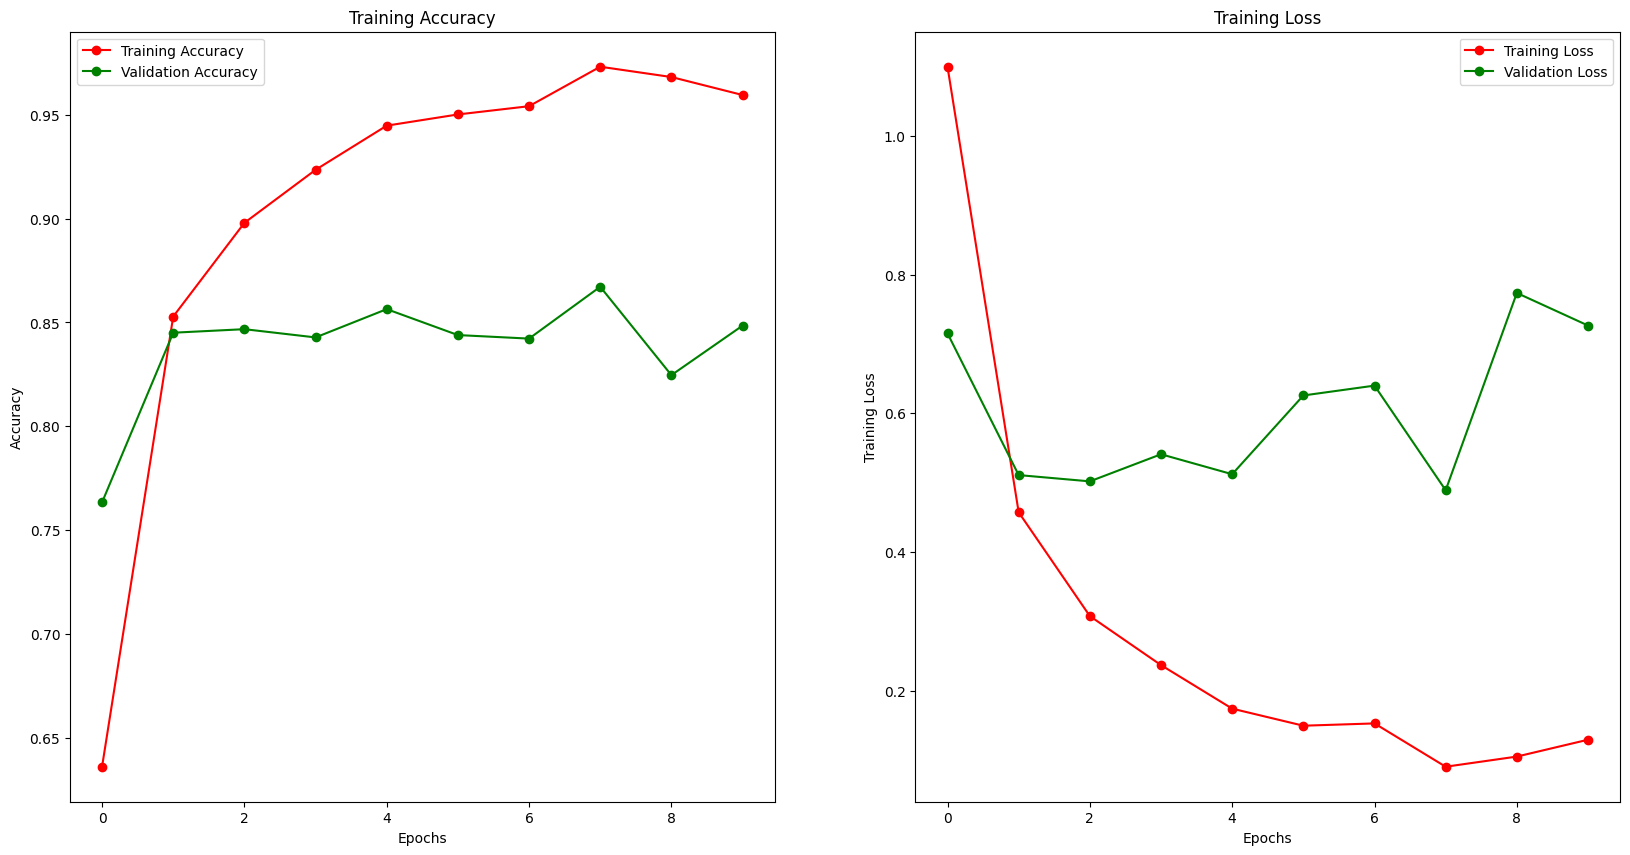

In [13]:
epochs = list(range(len(history3.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history3.history['accuracy']
train_loss = history3.history['loss']
val_acc = history3.history['val_accuracy']
val_loss = history3.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

56/56 [==============================] - 14s 254ms/step


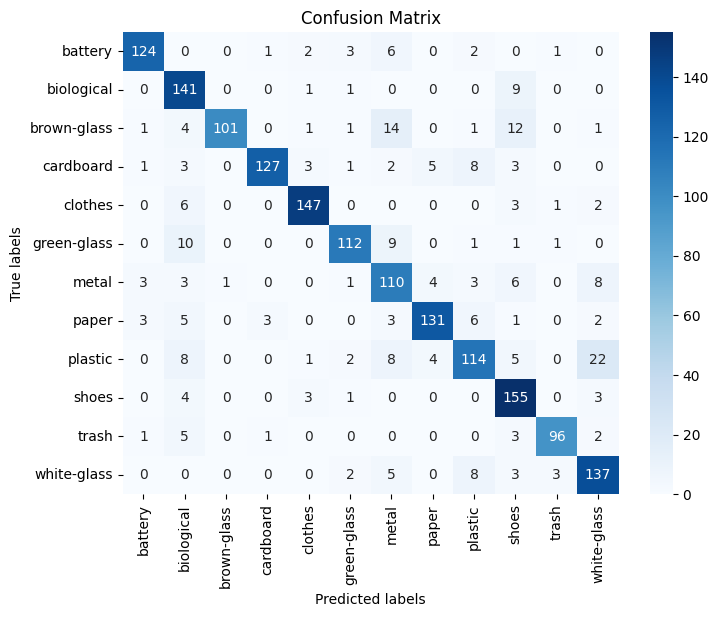

In [14]:
class_names = list(labels.columns)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [15]:
print(metrics.classification_report(y_true, y_pred_classes, target_names=labels.columns))

              precision    recall  f1-score   support

     battery       0.93      0.89      0.91       139
  biological       0.75      0.93      0.83       152
 brown-glass       0.99      0.74      0.85       136
   cardboard       0.96      0.83      0.89       153
     clothes       0.93      0.92      0.93       159
 green-glass       0.90      0.84      0.87       134
       metal       0.70      0.79      0.74       139
       paper       0.91      0.85      0.88       154
     plastic       0.80      0.70      0.74       164
       shoes       0.77      0.93      0.84       166
       trash       0.94      0.89      0.91       108
 white-glass       0.77      0.87      0.82       158

    accuracy                           0.85      1762
   macro avg       0.86      0.85      0.85      1762
weighted avg       0.86      0.85      0.85      1762



In [16]:
accuracy3 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy3}")

Accuracy: 0.8484676503972758


### Let us change the splitting of the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [5]:
# Normalize the values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# VGG16 base model
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

# weights file for vgg16
weights_path = '/Users/aa.sobeih/Desktop/PDA Project2/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5' # this is where the file in my directory; if u want to run it, make sure to install the weights and put in the right path:)
base_model.load_weights(weights_path)

model4 = Sequential()
model4.add(base_model)
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(len(labels.columns), activation='softmax'))

opt = Adam(learning_rate=0.0001)  
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                                 
Total params: 21,140,556
Trainable params: 21,140,556
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model with more image processing
history4 = model4.fit(X_train, y_train, 
                      epochs=10, batch_size=32, 
                      validation_data=(X_test, y_test))

Epoch 1/10
193/193 [==============================] - 71s 356ms/step - loss: 1.1082 - accuracy: 0.6328 - val_loss: 0.6133 - val_accuracy: 0.8033
Epoch 2/10
193/193 [==============================] - 94s 487ms/step - loss: 0.4510 - accuracy: 0.8482 - val_loss: 0.4764 - val_accuracy: 0.8464
Epoch 3/10
193/193 [==============================] - 96s 500ms/step - loss: 0.2763 - accuracy: 0.9071 - val_loss: 0.6488 - val_accuracy: 0.7927
Epoch 4/10
193/193 [==============================] - 96s 499ms/step - loss: 0.1714 - accuracy: 0.9418 - val_loss: 0.5381 - val_accuracy: 0.8513
Epoch 5/10
193/193 [==============================] - 96s 499ms/step - loss: 0.1350 - accuracy: 0.9544 - val_loss: 0.5168 - val_accuracy: 0.8570
Epoch 6/10
193/193 [==============================] - 96s 499ms/step - loss: 0.1251 - accuracy: 0.9577 - val_loss: 0.6077 - val_accuracy: 0.8449
Epoch 7/10
193/193 [==============================] - 98s 506ms/step - loss: 0.0876 - accuracy: 0.9724 - val_loss: 0.5942 - val_ac

In [41]:
train_loss4, train_accuracy4 = model4.evaluate(X_train, y_train)
test_loss4, test_accuracy4 = model4.evaluate(X_test, y_test)
print(f'Train loss: {train_loss4}, Train accuracy: {train_accuracy4}')
print(f'Test loss: {test_loss4}, Test accuracy: {test_accuracy4}')

83/83 [==============================] - 9s 109ms/step - loss: 0.6386 - accuracy: 0.8574
Train loss: 0.04502035304903984, Train accuracy: 0.9857282042503357
Test loss: 0.6385670304298401, Test accuracy: 0.8573591113090515


C:\Users\shrou\AppData\Local\Temp\ipykernel_5172\3719512623.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
C:\Users\shrou\AppData\Local\Temp\ipykernel_5172\3719512623.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')


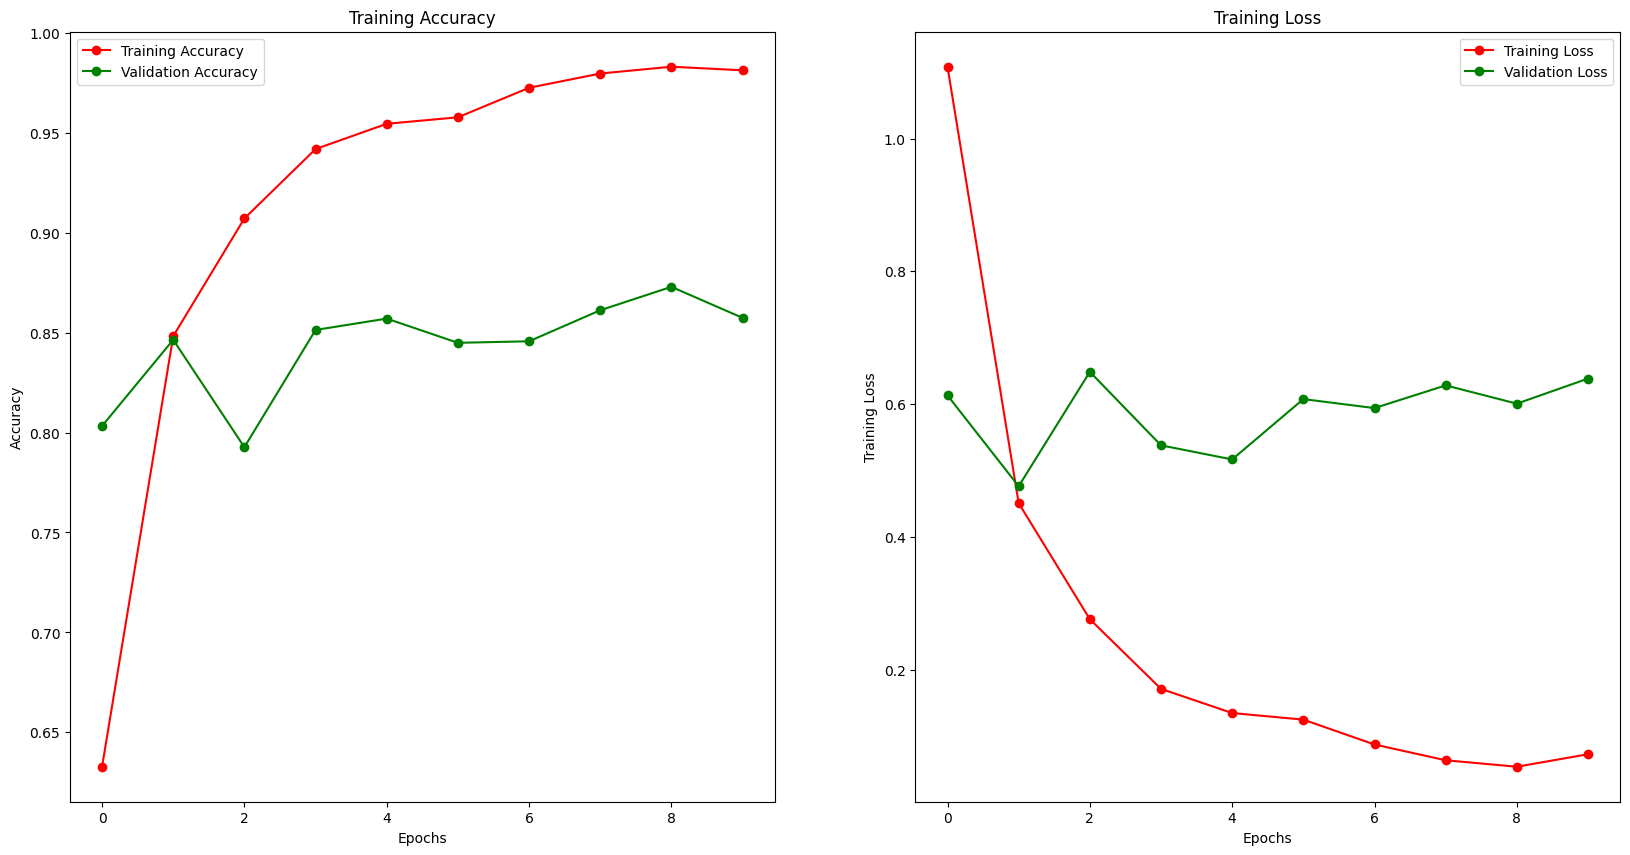

In [ ]:
epochs = list(range(len(history4.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history4.history['accuracy']
train_loss = history4.history['loss']
val_acc = history4.history['val_accuracy']
val_loss = history4.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model4.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

83/83 [==============================] - 9s 108ms/step


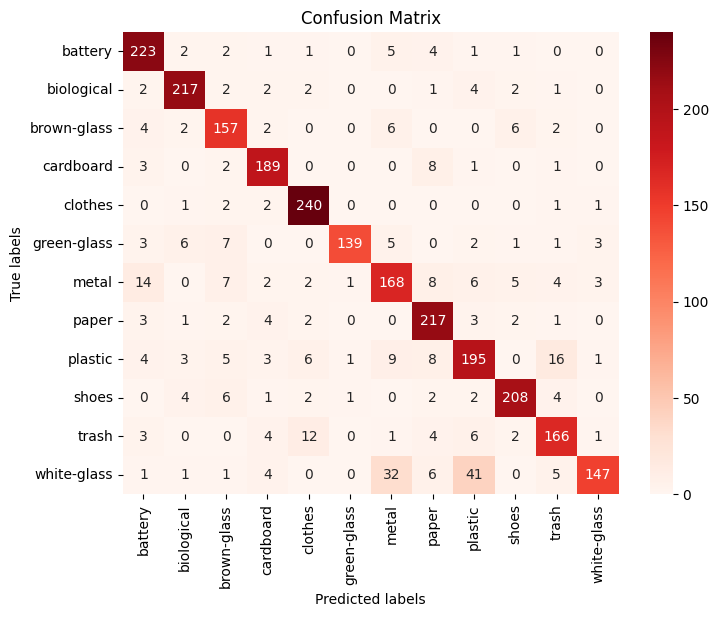

In [11]:
class_names = list(labels.columns)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [12]:
print(metrics.classification_report(y_true, y_pred_classes, target_names=labels.columns))

              precision    recall  f1-score   support

     battery       0.86      0.93      0.89       240
  biological       0.92      0.93      0.92       233
 brown-glass       0.81      0.88      0.84       179
   cardboard       0.88      0.93      0.90       204
     clothes       0.90      0.97      0.93       247
 green-glass       0.98      0.83      0.90       167
       metal       0.74      0.76      0.75       220
       paper       0.84      0.92      0.88       235
     plastic       0.75      0.78      0.76       251
       shoes       0.92      0.90      0.91       230
       trash       0.82      0.83      0.83       199
 white-glass       0.94      0.62      0.75       238

    accuracy                           0.86      2643
   macro avg       0.86      0.86      0.86      2643
weighted avg       0.86      0.86      0.86      2643



In [13]:
accuracy4 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy4}")

Accuracy: 0.857359061672342


In [7]:
# VGG16 base model
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

weights_path = '/Users/aa.sobeih/Desktop/PDA Project2/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5' # this is where the file in my directory; if u want to run it, make sure to install the weights and put in the right path:)
base_model.load_weights(weights_path)

model5 = Sequential()
model5.add(base_model)
model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dense(len(labels.columns), activation='softmax'))

opt = Adam(learning_rate=0.0001)  
model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                                 
Total params: 21,140,556
Trainable params: 21,140,556
Non-trainable params: 0
_________________________________________________________________


In [15]:
# performing more image processing (rotation, shifting, etc)
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


In [9]:
history5 = model5.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
193/193 [==============================] - 69s 347ms/step - loss: 1.3428 - accuracy: 0.5550 - val_loss: 0.8262 - val_accuracy: 0.7249
Epoch 2/10
193/193 [==============================] - 65s 336ms/step - loss: 0.7457 - accuracy: 0.7524 - val_loss: 0.6158 - val_accuracy: 0.8112
Epoch 3/10
193/193 [==============================] - 66s 341ms/step - loss: 0.5846 - accuracy: 0.8030 - val_loss: 0.6600 - val_accuracy: 0.8044
Epoch 4/10
193/193 [==============================] - 66s 339ms/step - loss: 0.5252 - accuracy: 0.8240 - val_loss: 0.5866 - val_accuracy: 0.8369
Epoch 5/10
193/193 [==============================] - 66s 342ms/step - loss: 0.4086 - accuracy: 0.8626 - val_loss: 0.5422 - val_accuracy: 0.8350
Epoch 6/10
193/193 [==============================] - 67s 346ms/step - loss: 0.3654 - accuracy: 0.8782 - val_loss: 0.5104 - val_accuracy: 0.8400
Epoch 7/10
193/193 [==============================] - 68s 351ms/step - loss: 0.3844 - accuracy: 0.8732 - val_loss: 0.3442 - val_ac

In [42]:
# Evaluate the model
train_loss5, train_accuracy5 = model5.evaluate(X_train, y_train)
test_loss5, test_accuracy5 = model5.evaluate(X_test, y_test)
print(f'Train loss: {train_loss5}, Train accuracy: {train_accuracy5}')
print(f'Test loss: {test_loss5}, Test accuracy: {test_accuracy5}')

83/83 [==============================] - 13s 147ms/step - loss: 0.3800 - accuracy: 0.8888
Train loss: 0.1346166729927063, Train accuracy: 0.9532922506332397
Test loss: 0.37999066710472107, Test accuracy: 0.8887628316879272


C:\Users\shrou\AppData\Local\Temp\ipykernel_11524\2180184380.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
C:\Users\shrou\AppData\Local\Temp\ipykernel_11524\2180184380.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')


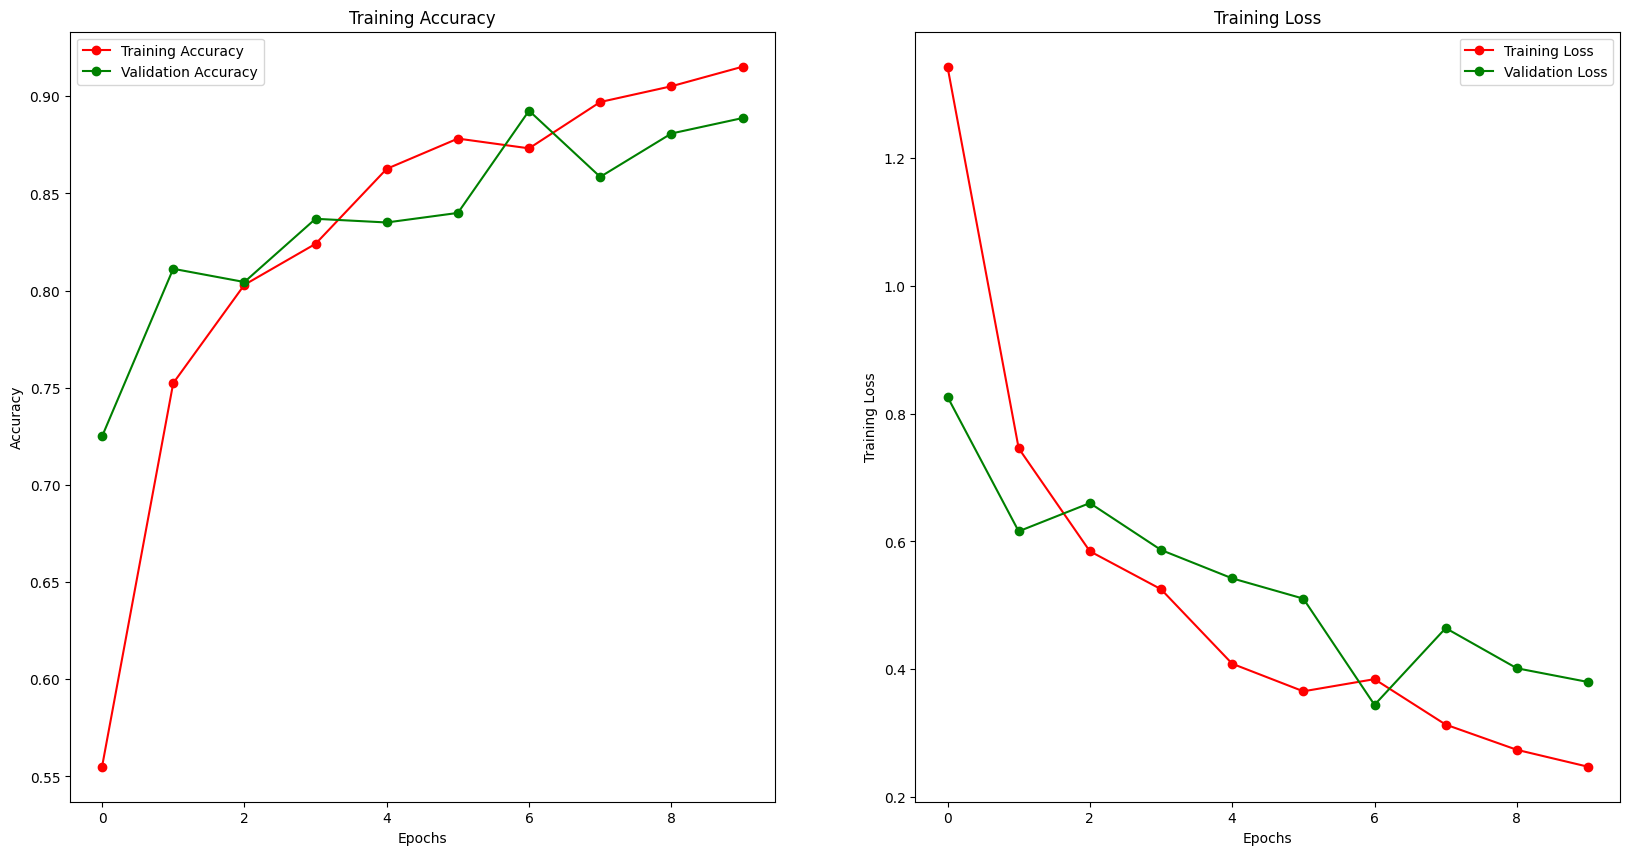

In [11]:
epochs = list(range(len(history5.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history5.history['accuracy']
train_loss = history5.history['loss']
val_acc = history5.history['val_accuracy']
val_loss = history5.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model5.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

83/83 [==============================] - 7s 87ms/step


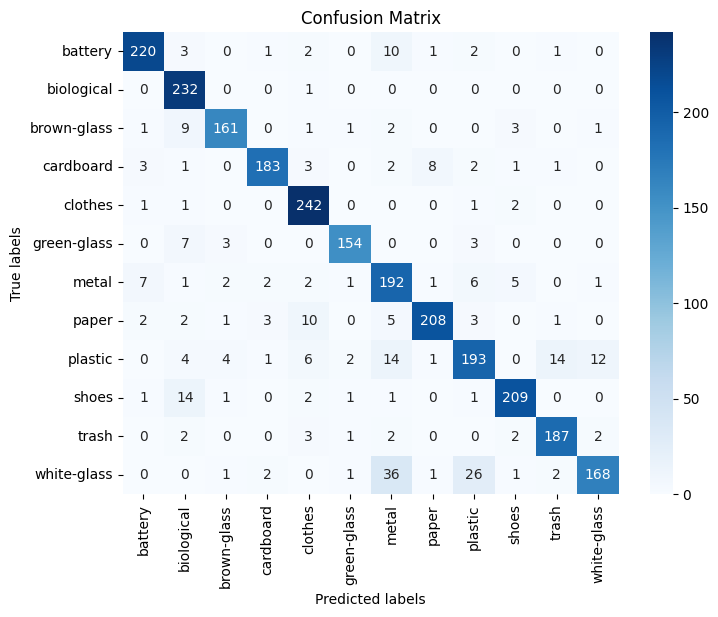

In [12]:
class_names = list(labels.columns)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [13]:
print(metrics.classification_report(y_true, y_pred_classes, target_names=labels.columns))

              precision    recall  f1-score   support

     battery       0.94      0.92      0.93       240
  biological       0.84      1.00      0.91       233
 brown-glass       0.93      0.90      0.91       179
   cardboard       0.95      0.90      0.92       204
     clothes       0.89      0.98      0.93       247
 green-glass       0.96      0.92      0.94       167
       metal       0.73      0.87      0.79       220
       paper       0.95      0.89      0.91       235
     plastic       0.81      0.77      0.79       251
       shoes       0.94      0.91      0.92       230
       trash       0.91      0.94      0.92       199
 white-glass       0.91      0.71      0.80       238

    accuracy                           0.89      2643
   macro avg       0.90      0.89      0.89      2643
weighted avg       0.89      0.89      0.89      2643



In [14]:
accuracy5 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy5}")

Accuracy: 0.8887627695800226


### How about another transfer learning model

In [7]:
# base model ResNet50
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'  # this is where the file in my directory; if u want to run it, make sure to install the weights and put in the right path:)
base_model.load_weights(weights_path)

# functional model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(labels.columns), activation='softmax')(x) 
model8 = Model(inputs=base_model.input, outputs=predictions)
opt = Adam(learning_rate=0.0001) 
model8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model8.summary()

2023-11-10 00:15:42.227282: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-10 00:15:42.227319: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-10 00:15:42.227322: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-10 00:15:42.227501: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-10 00:15:42.227542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

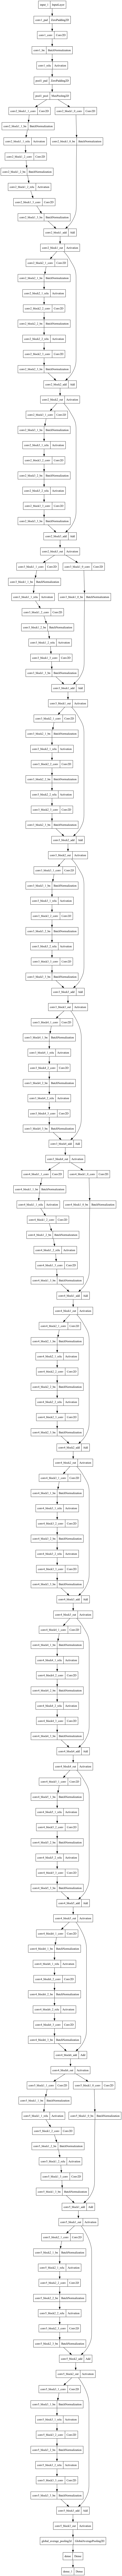

In [8]:
plot_model(model8) # plotting resnet50 in addition to what we implemented

In [9]:
history8 = model8.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


2023-11-10 00:17:03.265712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-10 00:17:04.118802: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


193/193 [==============================] - 133s 621ms/step - loss: 0.5134 - accuracy: 0.8412 - val_loss: 2.8881 - val_accuracy: 0.0711
Epoch 2/10
193/193 [==============================] - 116s 599ms/step - loss: 0.1100 - accuracy: 0.9664 - val_loss: 3.4189 - val_accuracy: 0.1411
Epoch 3/10
193/193 [==============================] - 116s 600ms/step - loss: 0.0865 - accuracy: 0.9711 - val_loss: 3.7843 - val_accuracy: 0.3186
Epoch 4/10
193/193 [==============================] - 116s 602ms/step - loss: 0.0778 - accuracy: 0.9741 - val_loss: 2.0471 - val_accuracy: 0.5830
Epoch 5/10
193/193 [==============================] - 116s 600ms/step - loss: 0.0809 - accuracy: 0.9750 - val_loss: 0.6697 - val_accuracy: 0.8214
Epoch 6/10
193/193 [==============================] - 116s 599ms/step - loss: 0.0468 - accuracy: 0.9838 - val_loss: 0.4122 - val_accuracy: 0.8770
Epoch 7/10
193/193 [==============================] - 116s 601ms/step - loss: 0.0622 - accuracy: 0.9791 - val_loss: 0.6218 - val_accura

In [43]:
train_loss8, train_accuracy8 = model8.evaluate(X_train, y_train)
test_loss8, test_accuracy8 = model8.evaluate(X_test, y_test)
print(f'Train loss: {train_loss8}, Train accuracy: {train_accuracy8}')
print(f'Test loss: {test_loss8}, Test accuracy: {test_accuracy8}')

83/83 [==============================] - 15s 185ms/step - loss: 0.3351 - accuracy: 0.9281
Train loss: 0.027886107563972473, Train accuracy: 0.9922153949737549
Test loss: 0.3351100981235504, Test accuracy: 0.9281120300292969


/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_915/3432761485.py:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.

/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_915/3432761485.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.



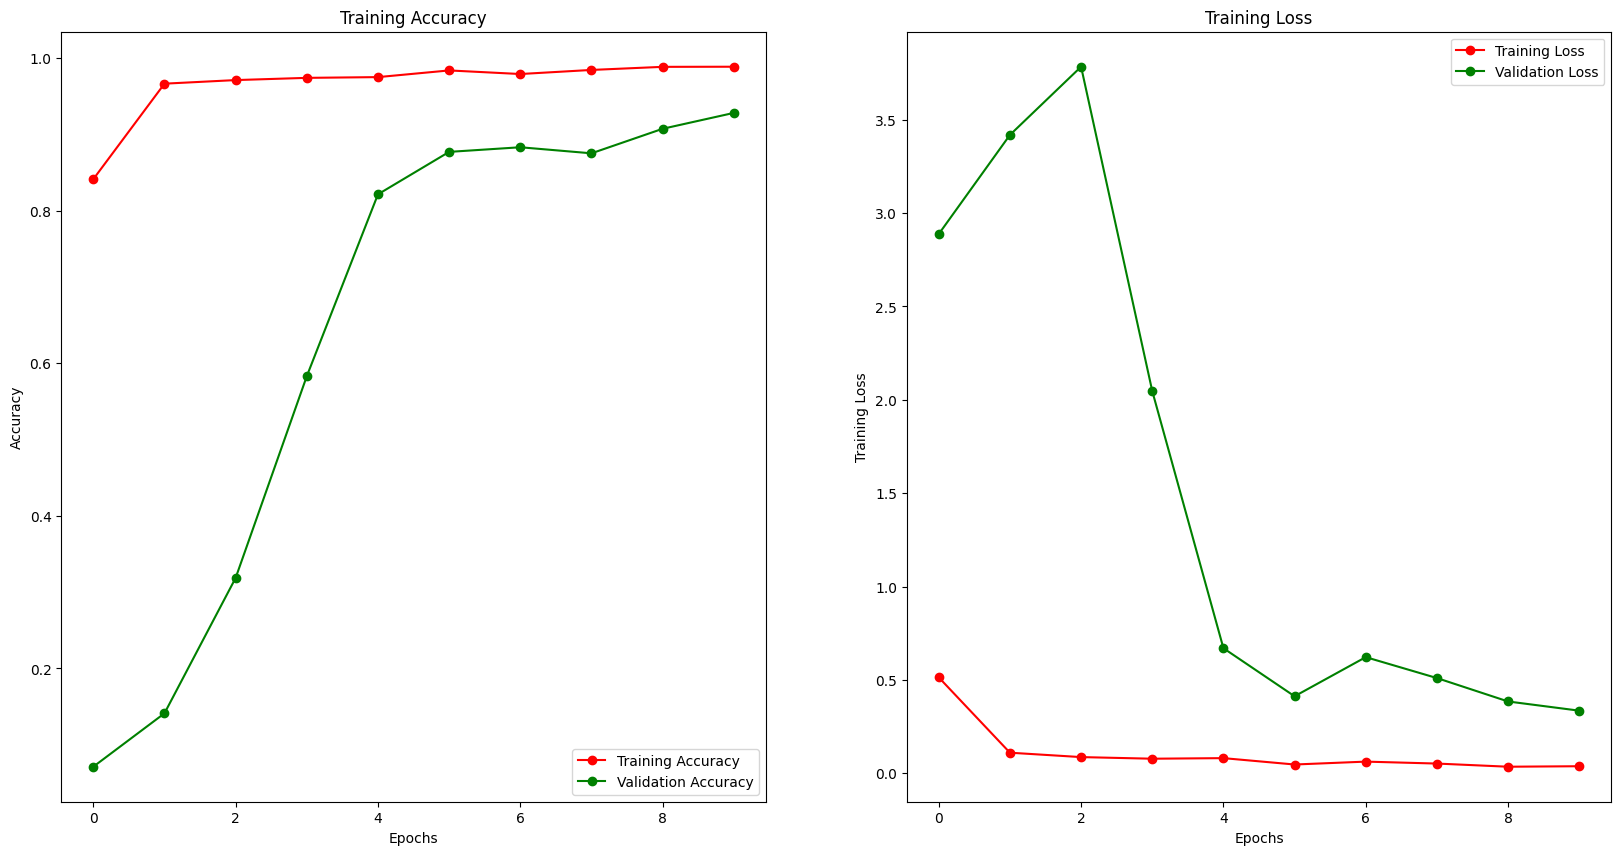

In [11]:
epochs = list(range(len(history8.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history8.history['accuracy']
train_loss = history8.history['loss']
val_acc = history8.history['val_accuracy']
val_loss = history8.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model8.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

83/83 [==============================] - 16s 175ms/step


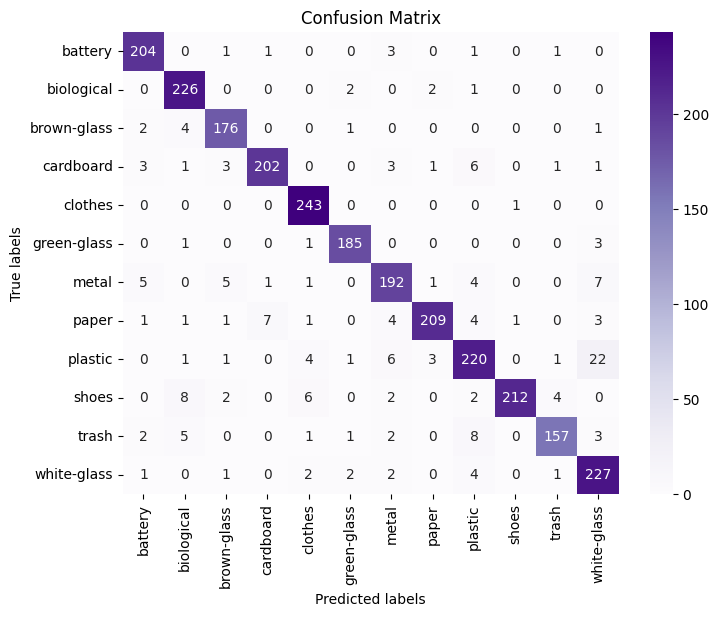

In [12]:
class_names = list(labels.columns)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [13]:
print(metrics.classification_report(y_true, y_pred_classes, target_names=labels.columns))

              precision    recall  f1-score   support

     battery       0.94      0.97      0.95       211
  biological       0.91      0.98      0.95       231
 brown-glass       0.93      0.96      0.94       184
   cardboard       0.96      0.91      0.94       221
     clothes       0.94      1.00      0.97       244
 green-glass       0.96      0.97      0.97       190
       metal       0.90      0.89      0.89       216
       paper       0.97      0.90      0.93       232
     plastic       0.88      0.85      0.86       259
       shoes       0.99      0.90      0.94       236
       trash       0.95      0.88      0.91       179
 white-glass       0.85      0.95      0.90       240

    accuracy                           0.93      2643
   macro avg       0.93      0.93      0.93      2643
weighted avg       0.93      0.93      0.93      2643



In [14]:
accuracy8 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy8}")

Accuracy: 0.9281119939462732


In [16]:
# saving the model to a file
model8.save('resnet_model1.h5')
# saving the weights to a file
model8.save_weights('resnet_model_weights1.h5')
# saving the model architecture to a JSON file
model_json = model8.to_json()
with open('resnet_model.json1', 'w') as json_file:
    json_file.write(model_json)
# saving the optimizer state
model8.save_weights('resnet_model_optimizer1.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
# optional; to load the model :)

# from keras.models import model_from_json

# # Load the model architecture from the JSON file
# with open('resnet_model.json1', 'r') as json_file:
#     loaded_model_json = json_file.read()
# loaded_model = model_from_json(loaded_model_json)

# # Load the saved weights into the model
# loaded_model.load_weights('resnet_model_weights1.h5')

# # Compile the model with the saved optimizer state
# loaded_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
# ResNet50 base model
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'  # this is where the file in my directory; if u want to run it, make sure to install the weights and put in the right path:)
base_model.load_weights(weights_path)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(labels.columns), activation='softmax')(x)  
model9 = Model(inputs=base_model.input, outputs=predictions)

opt = Adam(learning_rate=0.0001)  
model9.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model9.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [19]:
history9 = model9.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


2023-11-10 00:56:35.151593: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


193/193 [==============================] - 132s 617ms/step - loss: 0.6577 - accuracy: 0.7970 - val_loss: 3.4503 - val_accuracy: 0.0636
Epoch 2/10
193/193 [==============================] - 103s 520ms/step - loss: 0.2672 - accuracy: 0.9108 - val_loss: 2.8491 - val_accuracy: 0.1767
Epoch 3/10
193/193 [==============================] - 101s 519ms/step - loss: 0.2251 - accuracy: 0.9231 - val_loss: 3.1535 - val_accuracy: 0.3031
Epoch 4/10
193/193 [==============================] - 100s 517ms/step - loss: 0.1644 - accuracy: 0.9462 - val_loss: 4.4482 - val_accuracy: 0.3852
Epoch 5/10
193/193 [==============================] - 100s 517ms/step - loss: 0.1292 - accuracy: 0.9562 - val_loss: 1.0288 - val_accuracy: 0.7510
Epoch 6/10
193/193 [==============================] - 100s 519ms/step - loss: 0.1368 - accuracy: 0.9570 - val_loss: 0.4271 - val_accuracy: 0.8994
Epoch 7/10
193/193 [==============================] - 100s 515ms/step - loss: 0.1249 - accuracy: 0.9620 - val_loss: 0.3756 - val_accura

In [44]:
train_loss9, train_accuracy9 = model9.evaluate(X_train, y_train)
test_loss9, test_accuracy9 = model9.evaluate(X_test, y_test)
print(f'Train loss: {train_loss9}, Train accuracy: {train_accuracy9}')
print(f'Test loss: {test_loss9}, Test accuracy: {test_accuracy9}')

83/83 [==============================] - 15s 174ms/step - loss: 0.3203 - accuracy: 0.9236
Train loss: 0.07643266022205353, Train accuracy: 0.9724294543266296
Test loss: 0.3203369975090027, Test accuracy: 0.923571765422821


/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_915/879840858.py:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.

/var/folders/p9/z4vql0r5459ggn97284q432h0000gn/T/ipykernel_915/879840858.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.



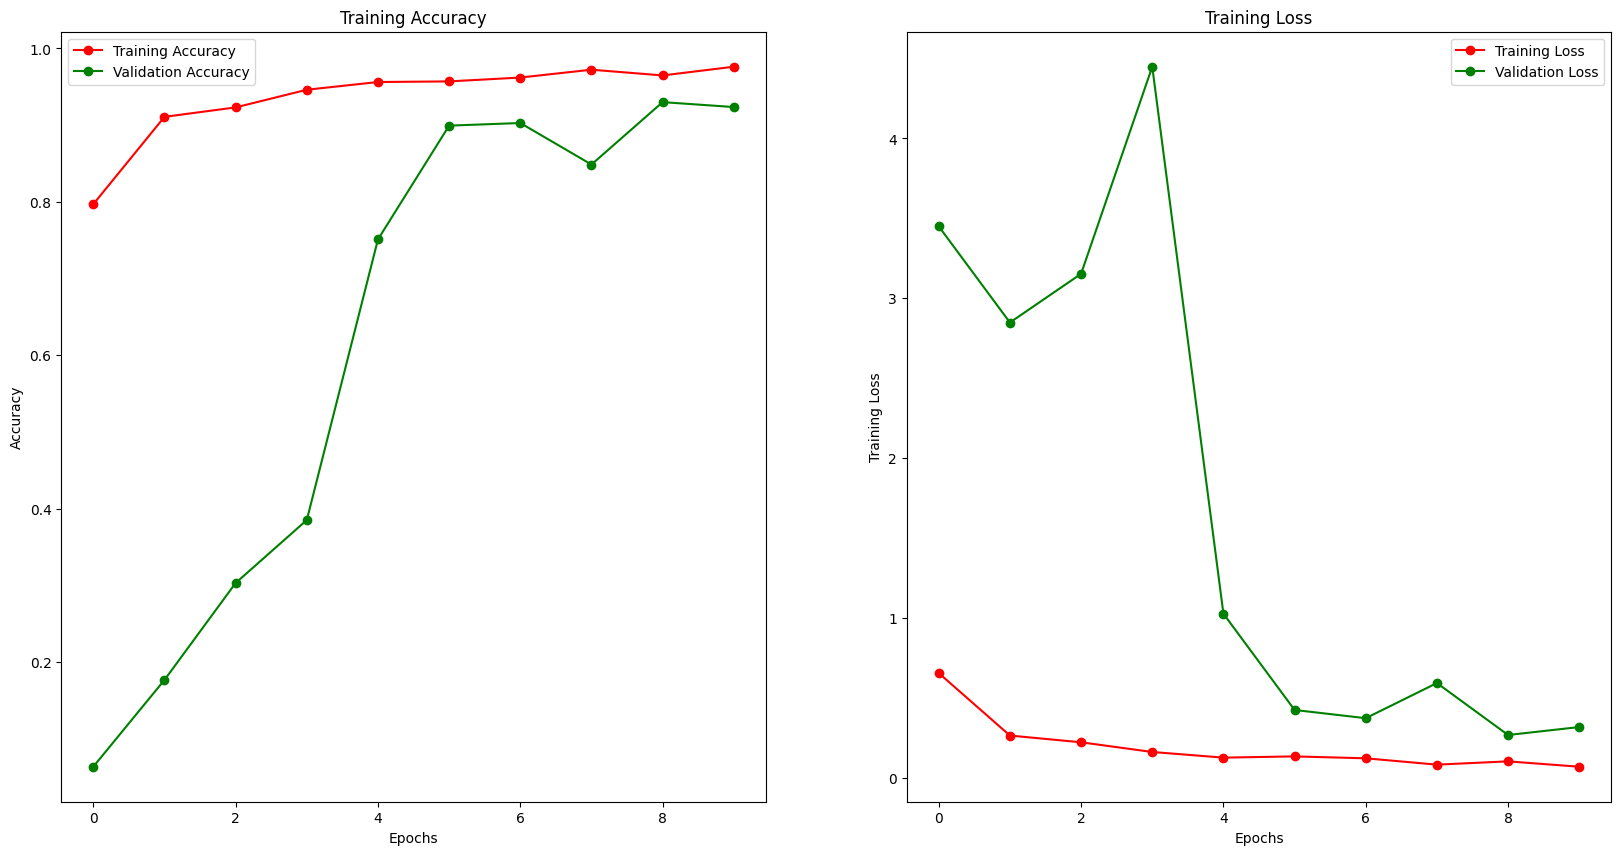

In [21]:
epochs = list(range(len(history9.history['accuracy'])))
fig , ax = plt.subplots(1,2)
train_acc = history9.history['accuracy']
train_loss = history9.history['loss']
val_acc = history9.history['val_accuracy']
val_loss = history9.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' ,color='r', label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' ,color='r', label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'go-' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

In [ ]:
y_pred = model9.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

83/83 [==============================] - 13s 153ms/step


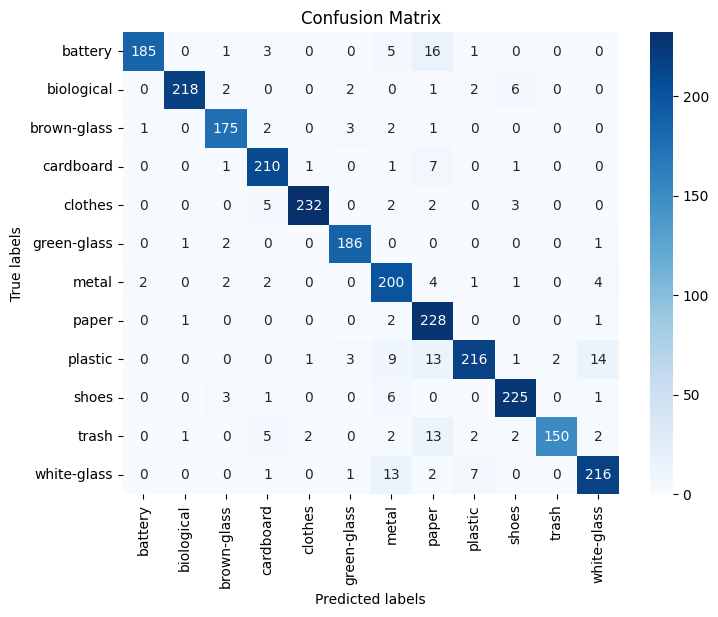

In [25]:
class_names = list(labels.columns)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [26]:
print(metrics.classification_report(y_true, y_pred_classes, target_names=labels.columns))

              precision    recall  f1-score   support

     battery       0.98      0.88      0.93       211
  biological       0.99      0.94      0.96       231
 brown-glass       0.94      0.95      0.95       184
   cardboard       0.92      0.95      0.93       221
     clothes       0.98      0.95      0.97       244
 green-glass       0.95      0.98      0.97       190
       metal       0.83      0.93      0.87       216
       paper       0.79      0.98      0.88       232
     plastic       0.94      0.83      0.89       259
       shoes       0.94      0.95      0.95       236
       trash       0.99      0.84      0.91       179
 white-glass       0.90      0.90      0.90       240

    accuracy                           0.92      2643
   macro avg       0.93      0.92      0.92      2643
weighted avg       0.93      0.92      0.92      2643



In [24]:
accuracy9 = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy9}")

Accuracy: 0.9235716988270904


### Summary Results

In [10]:
data = {
    'Model Name': ["Simple ANN", "Simple ANN with adjusted rates ", "Simple ANN with an extra hidden layer",
                   "More Complex; CNN", "Tranfer Learning VGG16", "Tranfer Learning VGG16", "Tranfer Learning VGG16", "Tranfer Learning Resnet50",
                    "Tranfer Learning Resnet50"],
    'Accuracy': [accuracy, accuracy1, accuracy11, accuracy2, accuracy3, accuracy4, accuracy5, accuracy8, accuracy9],
    'Split with 20%': [True, True, True, True, True, False, False, False, False],
    'Split with 30%': [False, False, False, False, False, True, True, True, True], 
    'With Data Augmentation': [False, False, False, False, False, False, True, False, True]
}
df = pd.DataFrame(data)
df['Accuracy'] = df['Accuracy'].round(2)

In [11]:
df

,Model Name,Accuracy,Split with 20%,Split with 30%,With Data Augmentation
0,Simple ANN,0.18,True,False,False
1,Simple ANN with adjusted rates,0.19,True,False,False
2,Simple ANN with an extra hidden layer,0.22,True,False,False
3,More Complex; CNN,0.65,True,False,False
4,Tranfer Learning VGG16,0.85,True,False,False
5,Tranfer Learning VGG16,0.86,False,True,False
6,Tranfer Learning VGG16,0.89,False,True,True
7,Tranfer Learning Resnet50,0.93,False,True,False
8,Tranfer Learning Resnet50,0.92,False,True,True


As shown above, the best model for our case is Transfer Learning Resnet50 with splitting of 30% testing and witout data augmentation achieving **93%** accuracy, although the difference between with or without data augmentation is minor.

This shows the progress of our testing for the models, from where we were to where we got